<a href="https://colab.research.google.com/github/carlosmirandadurand/Experiments/blob/main/Prophet_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facebook Prophet Forecasting Packege**
---
Source: https://facebook.github.io/prophet/docs/quick_start.html


In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
# Load time series data.  Wikipedia page for Peyton Manning scraped using the Wikipediatrend package in R
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [27]:
df.shape[0]/365

7.958904109589041

In [10]:
# Fit simple forecasting model to historical data. Simple = linear, additive model with yearly and weekly effects
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/cf0fipgv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/195lc45h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12248', 'data', 'file=/tmp/tmp1njg5ry4/cf0fipgv.json', 'init=/tmp/tmp1njg5ry4/195lc45h.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelj5w3glqj/prophet_model-20221217062723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:27:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:27:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
# Make dataframe that extends into the future a specified number of days
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [18]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3270 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.7 KB


In [24]:
future.shape[0] - df.shape[0]

365

In [16]:
# Predict time series values for future dataframe
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208452,7.483621,8.923281
3266,2017-01-16,8.533442,7.803411,9.247994
3267,2017-01-17,8.320853,7.594546,9.075932
3268,2017-01-18,8.153517,7.423689,8.887577
3269,2017-01-19,8.165423,7.385020,8.909000


In [25]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          3270 non-null   datetime64[ns]
 1   trend                       3270 non-null   float64       
 2   yhat_lower                  3270 non-null   float64       
 3   yhat_upper                  3270 non-null   float64       
 4   trend_lower                 3270 non-null   float64       
 5   trend_upper                 3270 non-null   float64       
 6   additive_terms              3270 non-null   float64       
 7   additive_terms_lower        3270 non-null   float64       
 8   additive_terms_upper        3270 non-null   float64       
 9   weekly                      3270 non-null   float64       
 10  weekly_lower                3270 non-null   float64       
 11  weekly_upper                3270 non-null   float64     

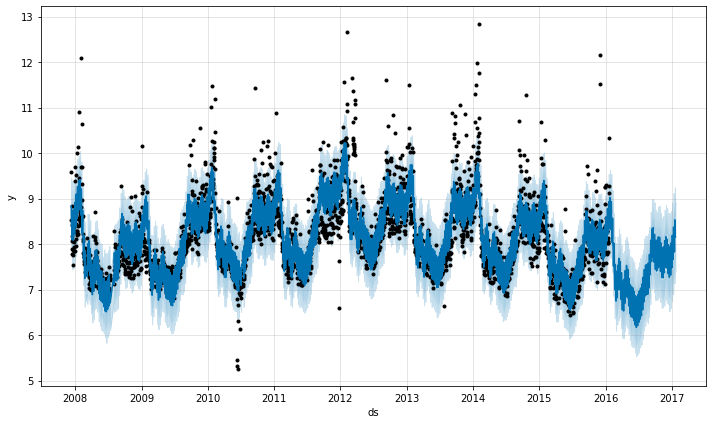

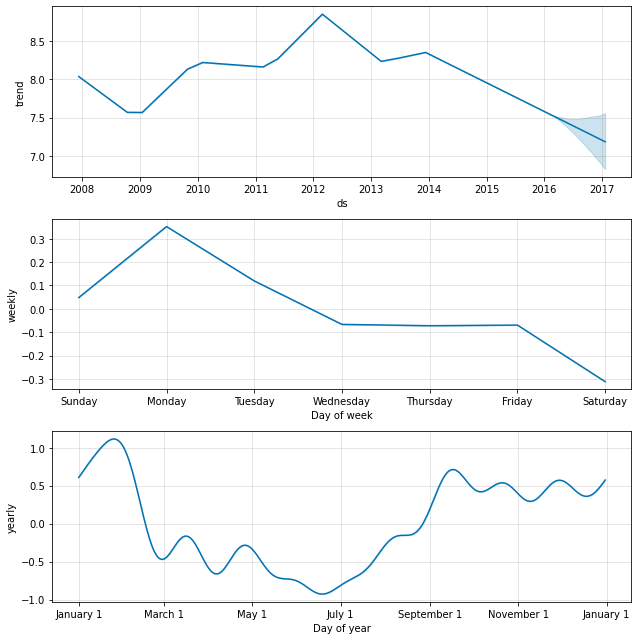

In [28]:
# Python
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [31]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [32]:
plot_components_plotly(m, forecast)

**Forecasting Growth with Saturating Model**

In [39]:
# Load different dataset: page visits to the R (programming language) page on Wikipedia
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2863 non-null   object 
 1   y       2863 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.9+ KB


In [40]:
# Set a cap (maximum achievable point, total market size, "carrying capacity")
df['cap'] = 8.5  # Constant in this case, but it doesn't have to be

In [41]:
# Fit historical data to a logistic growth trend model, with a specified carrying capacity
m = Prophet(growth='logistic')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/_adzg2md.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/0u4esrt2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36698', 'data', 'file=/tmp/tmp1njg5ry4/_adzg2md.json', 'init=/tmp/tmp1njg5ry4/0u4esrt2.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelhlu_8bad/prophet_model-20221217065225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:52:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:52:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


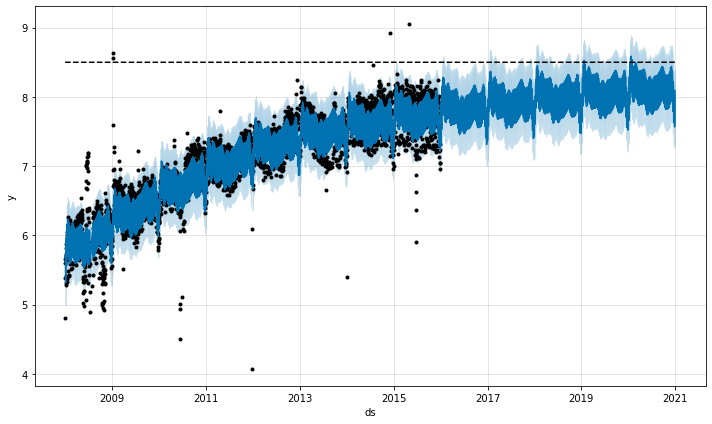

In [47]:
# Predict 5 years into the future, assuming constant capacity
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/w7rpqlw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/gtbqhu9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71426', 'data', 'file=/tmp/tmp1njg5ry4/w7rpqlw3.json', 'init=/tmp/tmp1njg5ry4/gtbqhu9n.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelfw5ntc1w/prophet_model-20221217065711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:57:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:57:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


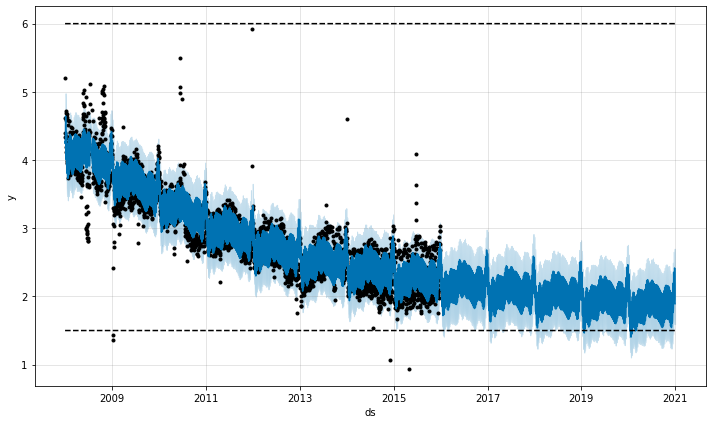

In [48]:
# Saturating Minimum:  Demonstrate how to use a floor
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)